In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('C:/Users/aksha/stack-overflow-developer-survey-2025/survey_results_public.csv')

C:\Users\aksha\AppData\Local\Temp\ipykernel_21236\2897364294.py:1: DtypeWarning: Columns (0,56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/aksha/stack-overflow-developer-survey-2025/survey_results_public.csv')


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

ResponseId                      MainBranch              Age  \
0          1  I am a developer by profession  25-34 years old   
1          2  I am a developer by profession  25-34 years old   
2          3  I am a developer by profession  35-44 years old   
3          4  I am a developer by profession  35-44 years old   
4          5  I am a developer by profession  35-44 years old   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1              Associate degree (A.A., A.S., etc.)   
2     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                          Employment  \
0                                           Employed   
1                                           Employed   
2  Independent contractor, freelancer, or self-em...   
3                                           Employed   
4  Independent contractor, freelancer, or self-em...   

                                    EmploymentAddl  WorkExp  \
0  Caring for dependents (children, elderly, etc.)      8.0   
1                                              NaN      2.0   
2                                None of the above     10.0   
3                                None of the above      4.0   
4  Caring for dependents (children, elderly, etc.)     21.0   

                                     LearnCodeChoose  \
0  Yes, I am not new to coding but am learning ne...   
1  Yes, I am not new to coding but am learning ne...   
2  Yes, I am not new to coding but am learning ne...   
3  Yes, I am not new to coding but am learning ne...   
4  No, I am not new to coding and did not learn n...   

                                           LearnCode  \
0  Online Courses or Certification (includes all ...   
1  Online Courses or Certification (includes all ...   
2  Online Courses or Certification (includes all ...   
3  Other online resources (e.g. standard search, ...   
4                                                NaN   

                                         LearnCodeAI  \
0  Yes, I learned how to use AI-enabled tools for...   
1  Yes, I learned how to use AI-enabled tools for...   
2  Yes, I learned how to use AI-enabled tools for...   
3  Yes, I learned how to use AI-enabled tools for...   
4  Yes, I learned how to use AI-enabled tools for...   

                                          AILearnHow  YearsCode  \
0                AI CodeGen tools or AI-enabled apps       14.0   
1                AI CodeGen tools or AI-enabled apps       10.0   
2  AI CodeGen tools or AI-enabled apps;Technical ...       12.0   
3  AI CodeGen tools or AI-enabled apps;Videos (no...        5.0   
4  Technical documentation (is generated for/by t...       22.0   

                DevType                   OrgSize                  ICorPM  \
0     Developer, mobile        20 to 99 employees          People manager   
1   Developer, back-end      500 to 999 employees  Individual contributor   
2  Developer, front-end                       NaN                     NaN   
3   Developer, back-end  10,000 or more employees  Individual contributor   
4   Engineering manager                       NaN                     NaN   

                                          RemoteWork  \
0                                             Remote   
1  Hybrid (some in-person, leans heavy to flexibi...   
2                                                NaN   
3                                             Remote   
4                                                NaN   

                                   PurchaseInfluence  TechEndorseIntro  \
0  Yes, I influenced the purchase of a substantia...              Work   
1                                                 No  Personal Project   
2                                                 No              Work   
3                                                 No  Person

In [5]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment',
       'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode',
       'LearnCodeAI',
       ...
       'AIAgentOrchestration', 'AIAgentOrchWrite', 'AIAgentObserveSecure',
       'AIAgentObsWrite', 'AIAgentExternal', 'AIAgentExtWrite', 'AIHuman',
       'AIOpen', 'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=172)

In [6]:
df = df[['Age', 'EdLevel', 'Employment', 'YearsCode', 'WorkExp', 'Country', 'JobSat', 'ConvertedCompYearly']]

In [7]:
df.head()

Age                                          EdLevel  \
0  25-34 years old  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1  25-34 years old              Associate degree (A.A., A.S., etc.)   
2  35-44 years old     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  35-44 years old     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  35-44 years old  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                          Employment  YearsCode  WorkExp  \
0                                           Employed       14.0      8.0   
1                                           Employed       10.0      2.0   
2  Independent contractor, freelancer, or self-em...       12.0     10.0   
3                                           Employed        5.0      4.0   
4  Independent contractor, freelancer, or self-em...       22.0     21.0   

       Country  JobSat  ConvertedCompYearly  
0      Ukraine    10.0              61256.0  
1  Netherlands     9.0             104413.0  
2      Ukraine     8.0              53061.0  
3      Ukraine     6.0              36197.0  
4      Ukraine     7.0              60000.0

In [8]:
df = df.query('Age != "Prefer not to say"')

In [9]:
df.head()

Age                                          EdLevel  \
0  25-34 years old  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1  25-34 years old              Associate degree (A.A., A.S., etc.)   
2  35-44 years old     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  35-44 years old     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  35-44 years old  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                          Employment  YearsCode  WorkExp  \
0                                           Employed       14.0      8.0   
1                                           Employed       10.0      2.0   
2  Independent contractor, freelancer, or self-em...       12.0     10.0   
3                                           Employed        5.0      4.0   
4  Independent contractor, freelancer, or self-em...       22.0     21.0   

       Country  JobSat  ConvertedCompYearly  
0      Ukraine    10.0              61256.0  
1  Netherlands     9.0             104413.0  
2      Ukraine     8.0              53061.0  
3      Ukraine     6.0              36197.0  
4      Ukraine     7.0              60000.0

In [10]:
df['Age'].value_counts()

Age
25-34 years old      16519
35-44 years old      13241
18-24 years old       9210
45-54 years old       6275
55-64 years old       2626
65 years or older      942
Name: count, dtype: int64

In [11]:
age_label = {
    '25-34 years old': np.random.randint(25, 34),
    '35-44 years old': np.random.randint(35, 44),
    '45-54 years old': np.random.randint(45, 54),
    '55-64 years old': np.random.randint(55, 64),
    '65 years or older': 65
}

df['Age'] = df['Age'].map(age_label)

In [12]:
df.head()

Age                                          EdLevel  \
0  27.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1  27.0              Associate degree (A.A., A.S., etc.)   
2  37.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3  37.0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4  37.0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                          Employment  YearsCode  WorkExp  \
0                                           Employed       14.0      8.0   
1                                           Employed       10.0      2.0   
2  Independent contractor, freelancer, or self-em...       12.0     10.0   
3                                           Employed        5.0      4.0   
4  Independent contractor, freelancer, or self-em...       22.0     21.0   

       Country  JobSat  ConvertedCompYearly  
0      Ukraine    10.0              61256.0  
1  Netherlands     9.0             104413.0  
2      Ukraine     8.0              53061.0  
3      Ukraine     6.0              36197.0  
4      Ukraine     7.0              60000.0

In [13]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          20224
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12532
Some college/university study without earning a degree                                 6152
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3571
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2591
Associate degree (A.A., A.S., etc.)                                                    1557
Other (please specify):                                                                 673
Primary/elementary school                                                               535
Name: count, dtype: int64

In [14]:
edlevel_label = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)" : "Bachelor’s degree",                                          
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" : "Master’s degree",                                
    "Some college/university study without earning a degree" : "College/University course",                                
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)" : 'Secondary school',
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)" : 'Professional degree',                                       
    "Associate degree (A.A., A.S., etc.)" : 'Associate degree',                                                   
    "Other (please specify):" : "Others",                                                               
    "Primary/elementary school" : "School"
}

In [15]:
df['EdLevel'] = df['EdLevel'].map(edlevel_label)

In [16]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat  ConvertedCompYearly  
0       14.0      8.0      Ukraine    10.0              61256.0  
1       10.0      2.0  Netherlands     9.0             104413.0  
2       12.0     10.0      Ukraine     8.0              53061.0  
3        5.0      4.0      Ukraine     6.0              36197.0  
4       22.0     21.0      Ukraine     7.0              60000.0

In [17]:
df['Employment'].value_counts()

Employment
Employed                                                33650
Independent contractor, freelancer, or self-employed     6654
Student                                                  4337
Not employed                                             2202
Retired                                                   698
I prefer not to say                                       448
Name: count, dtype: int64

In [18]:
df = df[df['Employment'] != 'I prefer not to say']

In [19]:
df['Employment'].value_counts()

Employment
Employed                                                33650
Independent contractor, freelancer, or self-employed     6654
Student                                                  4337
Not employed                                             2202
Retired                                                   698
Name: count, dtype: int64

In [20]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat  ConvertedCompYearly  
0       14.0      8.0      Ukraine    10.0              61256.0  
1       10.0      2.0  Netherlands     9.0             104413.0  
2       12.0     10.0      Ukraine     8.0              53061.0  
3        5.0      4.0      Ukraine     6.0              36197.0  
4       22.0     21.0      Ukraine     7.0              60000.0

In [21]:
df = df[df['Employment'].isin(['Employed', 'Independent contractor, freelancer, or self-employed'])]

In [22]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat  ConvertedCompYearly  
0       14.0      8.0      Ukraine    10.0              61256.0  
1       10.0      2.0  Netherlands     9.0             104413.0  
2       12.0     10.0      Ukraine     8.0              53061.0  
3        5.0      4.0      Ukraine     6.0              36197.0  
4       22.0     21.0      Ukraine     7.0              60000.0

In [23]:
len(df)

40304

In [24]:
df.isna().sum()

Age                     4643
EdLevel                   81
Employment                 0
YearsCode               3943
WorkExp                 1938
Country                10441
JobSat                 15410
ConvertedCompYearly    17768
dtype: int64

In [25]:
df = df.dropna()

In [26]:
len(df)

16988

In [27]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat  ConvertedCompYearly  
0       14.0      8.0      Ukraine    10.0              61256.0  
1       10.0      2.0  Netherlands     9.0             104413.0  
2       12.0     10.0      Ukraine     8.0              53061.0  
3        5.0      4.0      Ukraine     6.0              36197.0  
4       22.0     21.0      Ukraine     7.0              60000.0

In [28]:
df.isna().sum()

Age                    0
EdLevel                0
Employment             0
YearsCode              0
WorkExp                0
Country                0
JobSat                 0
ConvertedCompYearly    0
dtype: int64

In [29]:
df.isnull().sum()

Age                    0
EdLevel                0
Employment             0
YearsCode              0
WorkExp                0
Country                0
JobSat                 0
ConvertedCompYearly    0
dtype: int64

In [30]:
df = df.rename(columns={'ConvertedCompYearly':'Salary'})

In [31]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat    Salary  
0       14.0      8.0      Ukraine    10.0   61256.0  
1       10.0      2.0  Netherlands     9.0  104413.0  
2       12.0     10.0      Ukraine     8.0   53061.0  
3        5.0      4.0      Ukraine     6.0   36197.0  
4       22.0     21.0      Ukraine     7.0   60000.0

In [32]:
import plotly.express as px

In [33]:
df.describe()

Age     YearsCode       WorkExp        JobSat        Salary
count  16988.000000  16988.000000  16988.000000  16988.000000  1.698800e+04
mean      36.261714     19.233930     14.442842      7.239934  1.076156e+05
std        9.787434     10.382569      9.344935      1.922775  3.247838e+05
min       27.000000      1.000000      1.000000      0.000000  1.000000e+00
25%       27.000000     11.000000      7.000000      6.000000  5.005550e+04
50%       37.000000     17.000000     12.000000      8.000000  8.361600e+04
75%       37.000000     25.000000     20.000000      8.000000  1.304965e+05
max       65.000000    100.000000    100.000000     10.000000  3.355272e+07

In [34]:
df = df[df['Salary'] >= 10000]

In [35]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat    Salary  
0       14.0      8.0      Ukraine    10.0   61256.0  
1       10.0      2.0  Netherlands     9.0  104413.0  
2       12.0     10.0      Ukraine     8.0   53061.0  
3        5.0      4.0      Ukraine     6.0   36197.0  
4       22.0     21.0      Ukraine     7.0   60000.0

In [36]:
df.Salary.max()

33552715.0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15862 entries, 0 to 49127
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         15862 non-null  float64
 1   EdLevel     15862 non-null  object 
 2   Employment  15862 non-null  object 
 3   YearsCode   15862 non-null  float64
 4   WorkExp     15862 non-null  float64
 5   Country     15862 non-null  object 
 6   JobSat      15862 non-null  float64
 7   Salary      15862 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [38]:
country_data = pd.DataFrame(df['Country'].value_counts().reset_index())

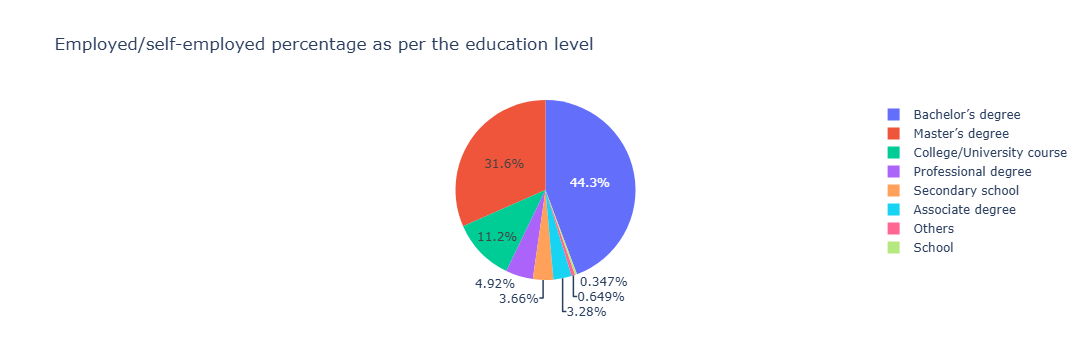

In [39]:
px.pie(data_frame=df, names='EdLevel', title='Employed/self-employed percentage as per the education level')

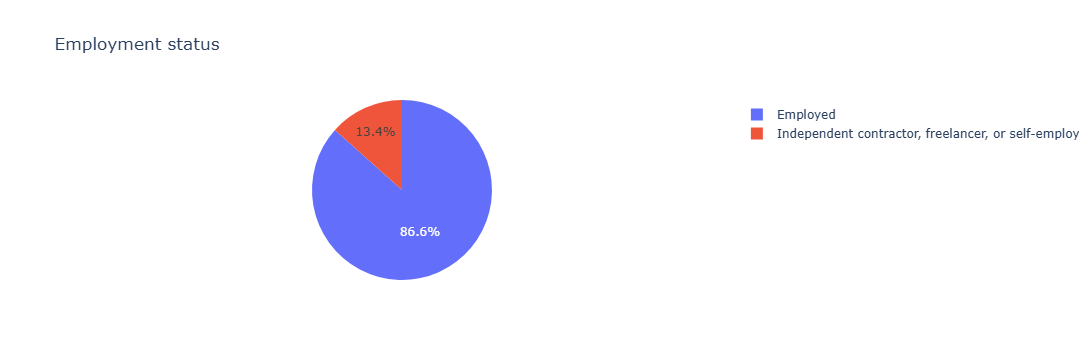

In [40]:
px.pie(data_frame=df, names='Employment', title='Employment status')

In [41]:
employment_status_countries = pd.DataFrame(df.groupby('Country')['Employment'].value_counts().reset_index())

In [42]:
employment_status_countries

Country  \
0                                              Albania   
1                                              Albania   
2                                              Algeria   
3                                              Algeria   
4                                              Andorra   
5                                              Andorra   
6                                               Angola   
7                                               Angola   
8                                            Argentina   
9                                            Argentina   
10                                             Armenia   
11                                           Australia   
12                                           Australia   
13                                             Austria   
14                                             Austria   
15                                          Azerbaijan   
16                                             Bahrain   
17                                          Bangladesh   
18                                          Bangladesh   
19                                            Barbados   
20                                             Belarus   
21                                             Belarus   
22                                             Belgium   
23                                             Belgium   
24                                              Bhutan   
25                                              Bhutan   
26                                             Bolivia   
27                                             Bolivia   
28                              Bosnia and Herzegovina   
29                              Bosnia and Herzegovina   
30                                              Brazil   
31                                              Brazil   
32                                            Bulgaria   
33                                            Bulgaria   
34                                            Cambodia   
35                                            Cameroon   
36                                              Canada   
37                                              Canada   
38                                               Chile   
39                                               Chile   
40                                               China   
41                                               China   
42                                            Colombia   
43                                            Colombia   
44                                          Costa Rica   
45                                          Costa Rica   
46                                             Croatia   
47                                             Croatia   
48                                                Cuba   
49                                                Cuba   
50                                              Cyprus   
51                                              Cyprus   
52                                      Czech Republic   
53                                      Czech Republic   
54                                       Côte d'Ivoire   
55                                       Côte d'Ivoire   
56                    Democratic Republic of the Congo   
57                    Democratic Republic of the Congo   
58                                             Denmark   
59                                             Denmark   
60                                  Dominican Republic   
61                                  Dominican Republic   
62                                             Ecuador   
63                                             Ecuador   
64                                               Egypt   
65                                         El Salvador   
66                                         El Salvador   
67                                             Estonia   
68                                           

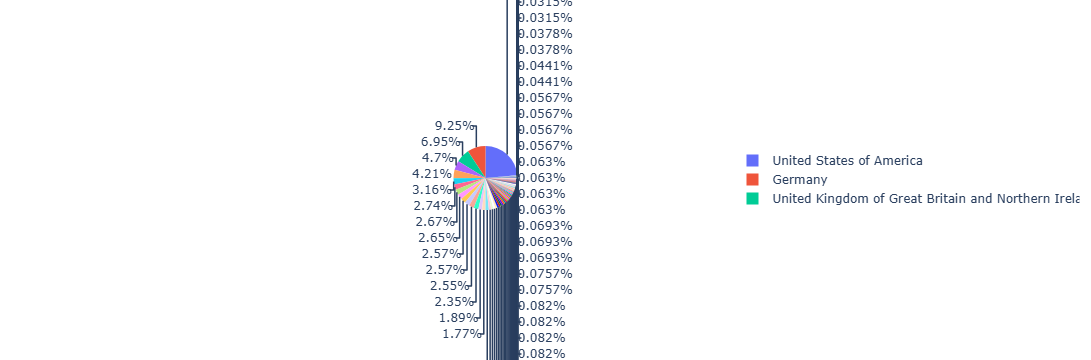

In [43]:
px.pie(data_frame=employment_status_countries, names='Country', values='count', hover_data='Employment')

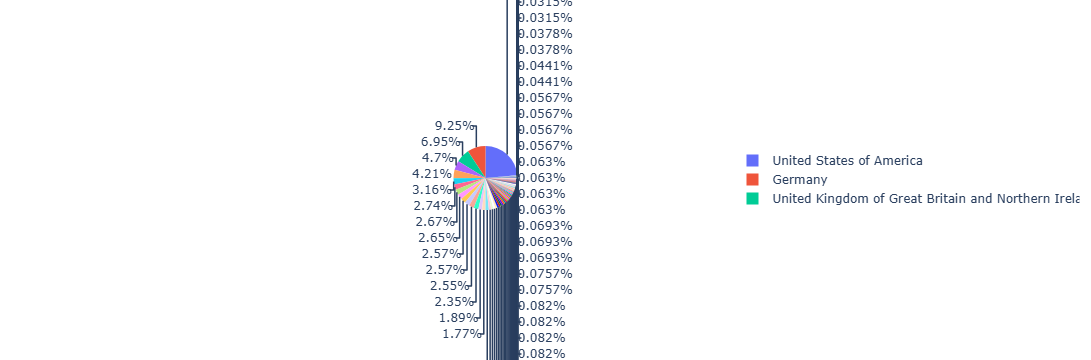

In [44]:
px.pie(data_frame=df, names='Country')

In [45]:
df = df[df['Salary'] > 1000]

In [46]:
len(df)

15862

In [47]:
countries_count = df['Country'].value_counts()

In [48]:
valid_countries = countries_count[countries_count >= 100].index

In [49]:
valid_countries

Index(['United States of America', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Canada', 'India', 'Netherlands', 'Italy', 'Australia', 'Spain',
       'Brazil', 'Poland', 'Sweden', 'Switzerland', 'Ukraine',
       'Czech Republic', 'Austria', 'Portugal', 'Denmark', 'Belgium', 'Norway',
       'Romania', 'Finland', 'Greece', 'Israel', 'New Zealand', 'Ireland',
       'Mexico', 'South Africa', 'Hungary', 'Argentina', 'Bulgaria'],
      dtype='object', name='Country')

In [50]:
df = df[df['Country'].isin(valid_countries)]

In [51]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat    Salary  
0       14.0      8.0      Ukraine    10.0   61256.0  
1       10.0      2.0  Netherlands     9.0  104413.0  
2       12.0     10.0      Ukraine     8.0   53061.0  
3        5.0      4.0      Ukraine     6.0   36197.0  
4       22.0     21.0      Ukraine     7.0   60000.0

In [52]:
len(df)

14142

In [53]:
X = df.drop(columns=['Salary'])
y = df[['Salary']]

In [54]:
y_log = np.log1p(y)

In [55]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [56]:
cat_cols

['EdLevel', 'Employment', 'Country']

In [57]:
X['Country'].nunique()

32

In [58]:
from sklearn.impute import SimpleImputer
cat_trans = Pipeline(steps=[
    ('imputing', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [59]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_trans, cat_cols)
], remainder='passthrough')

In [60]:
num_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()

In [61]:
X[num_cols].skew()

Age          0.722161
YearsCode    0.758625
WorkExp      0.904600
JobSat      -1.025927
dtype: float64

In [62]:
df.JobSat.value_counts()

JobSat
8.0     3885
7.0     3026
9.0     2080
6.0     1697
10.0    1369
5.0      853
3.0      438
4.0      405
2.0      235
1.0       84
0.0       70
Name: count, dtype: int64

In [63]:
X[num_cols].corr()

Age  YearsCode   WorkExp    JobSat
Age        1.000000   0.789569  0.854858  0.069725
YearsCode  0.789569   1.000000  0.880321  0.075109
WorkExp    0.854858   0.880321  1.000000  0.086718
JobSat     0.069725   0.075109  0.086718  1.000000

In [64]:
X = X.drop(columns=['YearsCode'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((11313, 6), (2829, 6), (11313, 1), (2829, 1))

In [67]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

In [68]:
X_train_pre_df = pd.DataFrame(X_train_pre, columns=preprocessor.get_feature_names_out())
X_test_pre_df = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())

In [69]:
X_train_pre_df.head()

cat__EdLevel_Associate degree  cat__EdLevel_Bachelor’s degree  \
0                            0.0                             1.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             1.0   
4                            0.0                             0.0   

   cat__EdLevel_College/University course  cat__EdLevel_Master’s degree  \
0                                     0.0                           0.0   
1                                     0.0                           1.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           1.0   

   cat__EdLevel_Others  cat__EdLevel_Professional degree  cat__EdLevel_School  \
0                  0.0                               0.0                  0.0   
1                  0.0                               0.0                  0.0   
2                  0.0                               0.0                  0.0   
3                  0.0                               0.0                  0.0   
4                  0.0                               0.0                  0.0   

   cat__EdLevel_Secondary school  cat__Employment_Employed  \
0                            0.0                       1.0   
1                            0.0                       1.0   
2                            1.0                       1.0   
3                            0.0                       1.0   
4                            0.0                       1.0   

   cat__Employment_Independent contractor, freelancer, or self-employed  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   cat__Country_Argentina  cat__Country_Australia  cat__Country_Austria  \
0                     0.0                     0.0                   0.0   
1                     0.0                     0.0                   0.0   
2                     0.0                     0.0                   0.0   
3                     0.0                     0.0                   0.0   
4                     0.0                     0.0                   0.0   

   cat__Country_Belgium  cat__Country_Brazil  cat__Country_Bulgaria  \
0                   0.0                  0.0                    0.0   
1                   0.0                  0.0                    0.0   
2                   0.0                  0.0                    0.0   
3                   0.0                  0.0                    0.0   
4                   0.0                  0.0                    0.0   

   cat__Country_Canada  cat__Country_Czech Republic  cat__Country_Denmark  \
0                  0.0                          0.0                   0.0   
1                  0.0                          0.0                   0.0   
2                  0.0                          0.0                   0.0   
3                  0.0                          0.0                   0.0   
4                  0.0                          0.0                   0.0   

   cat__Country_Finland  cat__Country_France  cat__Country_Germany  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   1.0   
4                   0.0                  1.0                   0.0   

   cat__Country_Greece  cat__Country_Hungary  cat__Country_India  \
0 

In [70]:
X_train_pre_df = X_train_pre_df.rename(columns={
    'remainder__Age' : 'Age',
    'remainder__YearsCode' : 'YearsCode',
    'remainder__WorkExp' : 'WorkExp',
    'remainder__JobSat' : 'JobSat'
})
X_test_pre_df = X_test_pre_df.rename(columns={
    'remainder__Age' : 'Age',
    'remainder__YearsCode' : 'YearsCode',
    'remainder__WorkExp' : 'WorkExp',
    'remainder__JobSat' : 'JobSat'
})

In [71]:
X_train_pre_df.corr()

cat__EdLevel_Associate degree  \
cat__EdLevel_Associate degree                                            1.000000   
cat__EdLevel_Bachelor’s degree                                          -0.164661   
cat__EdLevel_College/University course                                  -0.066360   
cat__EdLevel_Master’s degree                                            -0.127914   
cat__EdLevel_Others                                                     -0.015995   
cat__EdLevel_Professional degree                                        -0.043515   
cat__EdLevel_School                                                     -0.011697   
cat__EdLevel_Secondary school                                           -0.036984   
cat__Employment_Employed                                                 0.011366   
cat__Employment_Independent contractor, freelan...                      -0.011366   
cat__Country_Argentina                                                  -0.003959   
cat__Country_Australia                                                  -0.007446   
cat__Country_Austria                                                     0.003782   
cat__Country_Belgium                                                    -0.011011   
cat__Country_Brazil                                                      0.046136   
cat__Country_Bulgaria                                                   -0.010233   
cat__Country_Canada                                                      0.032728   
cat__Country_Czech Republic                                             -0.018422   
cat__Country_Denmark                                                     0.024198   
cat__Country_Finland                                                    -0.013460   
cat__Country_France                                                     -0.003006   
cat__Country_Germany                                                    -0.017507   
cat__Country_Greece                                                     -0.002179   
cat__Country_Hungary                                                     0.006582   
cat__Country_India                                                      -0.035605   
cat__Country_Ireland                                                    -0.001505   
cat__Country_Israel                                                     -0.013132   
cat__Country_Italy                                                      -0.004142   
cat__Country_Mexico                                                     -0.012571   
cat__Country_Netherlands                                                 0.000619   
cat__Country_New Zealand                                                 0.001201   
cat__Country_Norway                                                     -0.014202   
cat__Country_Poland                                                     -0.028990   
cat__Country_Portugal                                                   -0.002992   
cat__Country_Romania                                                    -0.012341   
cat__Country_South Africa                                               -0.000804   
cat__Country_Spain                                                       0.032770   
cat__Country_Sweden                                                     -0.001183   
cat__Country_Switzerland                                                -0.007108   
cat__Country_Ukraine                                                    -0.016412   
cat__Country_United Kingdom of Great Britain an...                      -0.031100   
cat__Country_United States of America                                    0.043537   
Age                                                                      0.018094   
WorkExp                                                                  0.022560   
JobSat                                                                   0.008884   

                                                    cat__EdLevel_Bachelor’s degree  \
cat__EdLevel_Associate degree                          

In [72]:
from sklearn.svm import SVR
lgr = LinearRegression()
svr = SVR(C=0.5, kernel='rbf', epsilon=0.1)
rfr = RandomForestRegressor(n_estimators=100,
                            criterion='squared_error',
                            max_depth=8,
                            min_samples_split=4,
                            min_samples_leaf=2,
                            n_jobs=1,
                            random_state=42,
                            verbose=0)

In [73]:
X.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   WorkExp      Country  JobSat  
0      8.0      Ukraine    10.0  
1      2.0  Netherlands     9.0  
2     10.0      Ukraine     8.0  
3      4.0      Ukraine     6.0  
4     21.0      Ukraine     7.0

In [74]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat    Salary  
0       14.0      8.0      Ukraine    10.0   61256.0  
1       10.0      2.0  Netherlands     9.0  104413.0  
2       12.0     10.0      Ukraine     8.0   53061.0  
3        5.0      4.0      Ukraine     6.0   36197.0  
4       22.0     21.0      Ukraine     7.0   60000.0

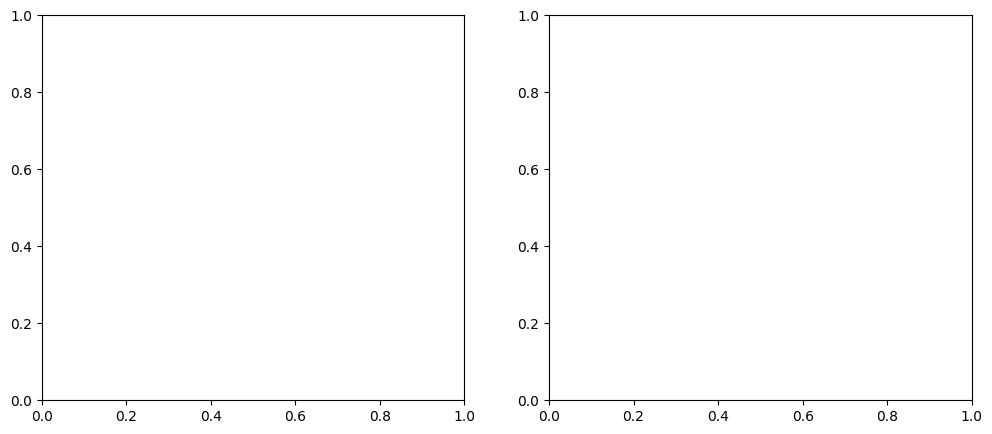

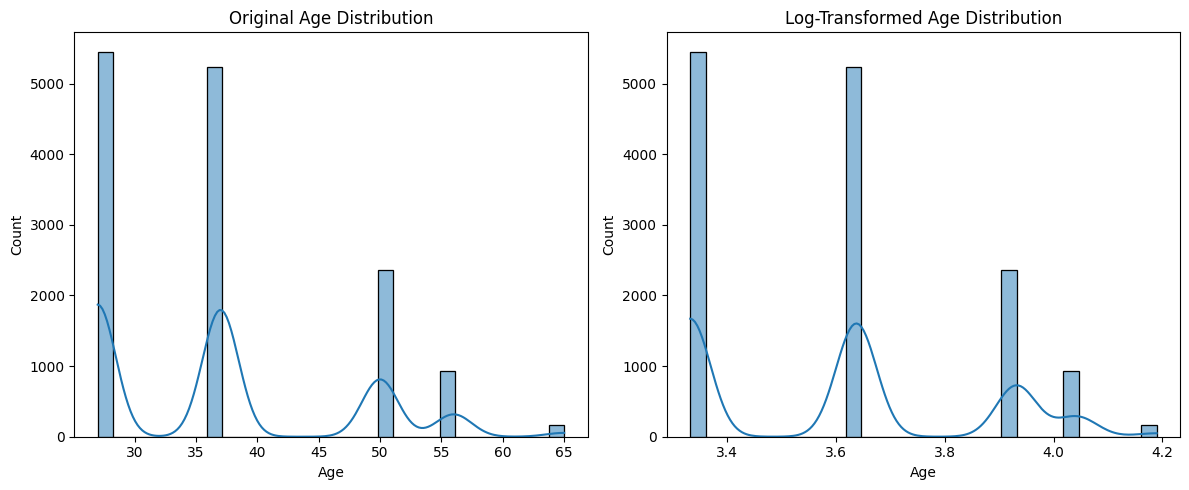

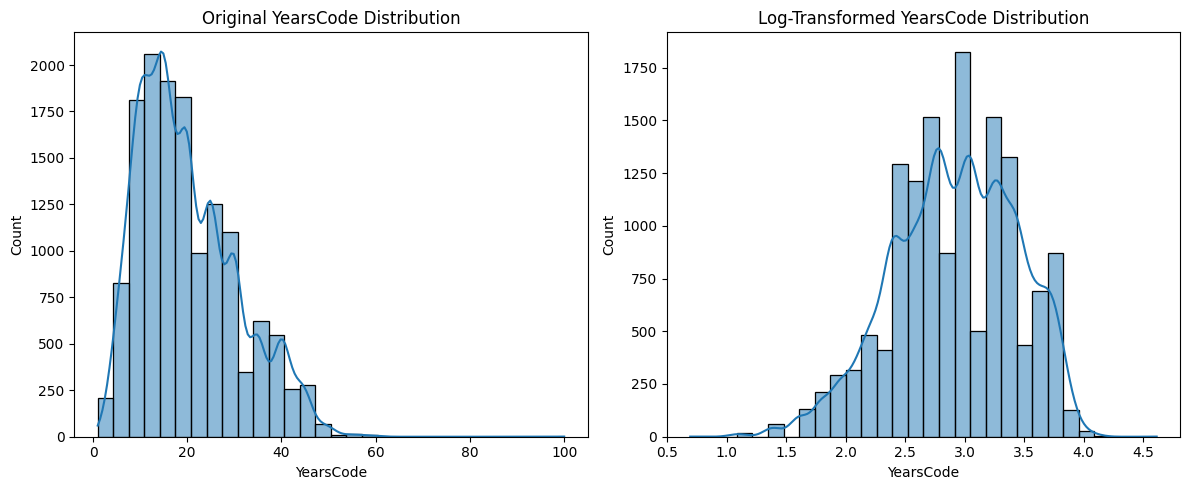

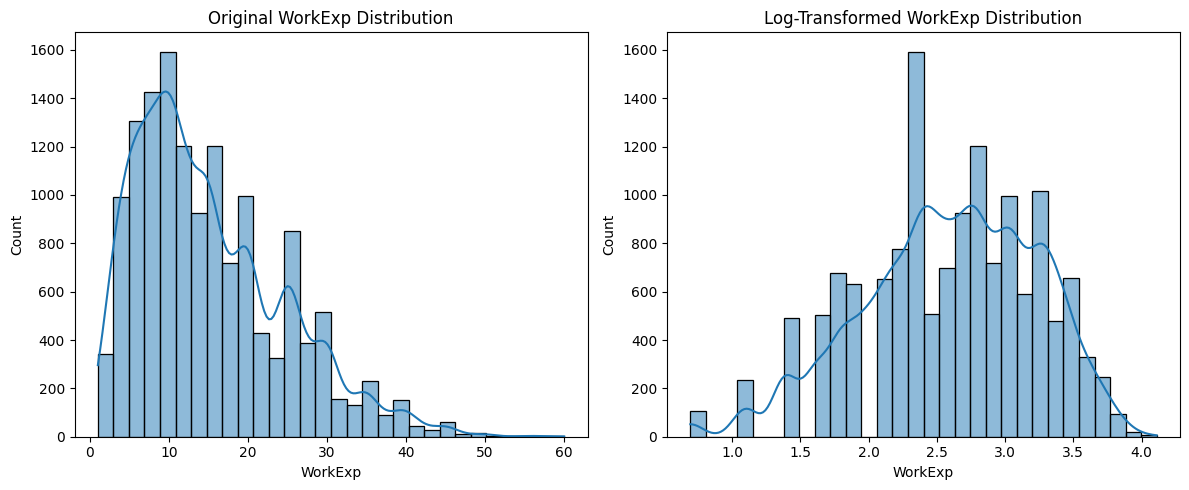

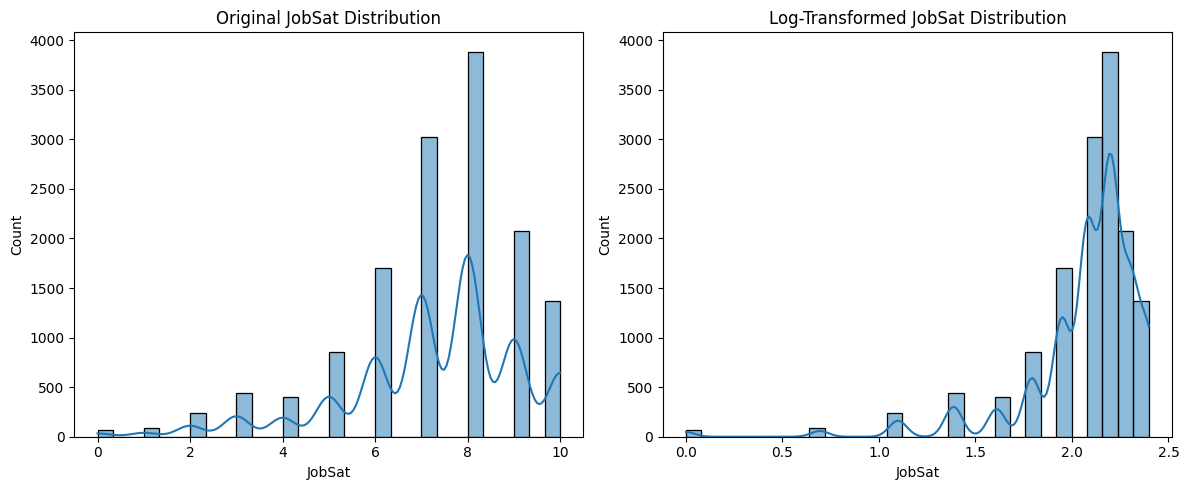

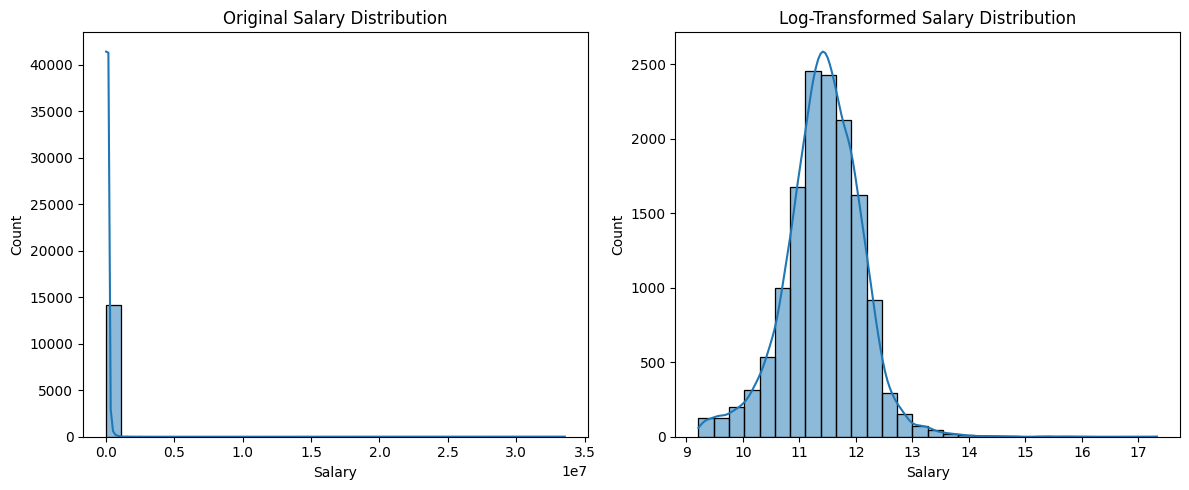

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

num_cols.append('Salary')
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Original salary
    sns.histplot(df[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Original {col} Distribution")

    # Log-transformed salary
    sns.histplot(np.log1p(df[col]), kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f"Log-Transformed {col} Distribution")

    plt.tight_layout()
    plt.show()

In [76]:
y_log.skew()

Salary   -0.08173
dtype: float64

In [77]:
lgr.fit(X_train_pre, y_train)

LinearRegression()

In [78]:
svr.fit(X_train_pre, y_train)

C:\Users\aksha\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=0.5)

In [79]:
rfr.fit(X_train_pre, y_train)

C:\Users\aksha\anaconda3\envs\ml_env\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                      n_jobs=1, random_state=42)

In [80]:
y_lgr_pred = lgr.predict(X_test_pre)
y_svr_pred = svr.predict(X_test_pre)
y_rfr_pred = rfr.predict(X_test_pre)

In [81]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_lgr_pred))
print(r2_score(y_test, y_svr_pred))
print(r2_score(y_test, y_rfr_pred))

0.47837876872428564
0.3686185821797686
0.45479346021231193


In [82]:
print(np.sqrt(mean_squared_error(y_test, y_lgr_pred)))
print(np.sqrt(mean_squared_error(y_test, y_svr_pred)))
print(np.sqrt(mean_squared_error(y_test, y_rfr_pred)))

0.48565976045221027
0.5343187191098698
0.49651802545724444


In [83]:
y_test_raw = np.expm1(y_test)
y_lgr_pred_raw = np.expm1(y_lgr_pred)
y_svr_pred_raw = np.expm1(y_svr_pred)
y_rfr_pred_raw = np.expm1(y_rfr_pred)

In [84]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test_raw, y_lgr_pred_raw))
print(mean_absolute_error(y_test_raw, y_svr_pred_raw))
print(mean_absolute_error(y_test_raw, y_rfr_pred_raw))

41967.31255203745
44556.71833423737
42835.343875666644


In [85]:
df = df.reset_index(drop=True)
y_log = y_log.reset_index(drop=True)

In [86]:
df['lgr_pred'] = np.nan
df['svr_pred'] = np.nan
df['rfr_pred'] = np.nan

In [87]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
y_log

Salary
0      11.022833
1      11.556119
2      10.879216
3      10.496759
4      11.002117
5      11.695255
6      11.184435
7      11.156265
8      11.092732
9      11.379406
10     11.598314
11     11.997953
12     12.253166
13     12.230770
14     12.429220
15     12.072547
16     11.463031
17     11.599112
18     11.420986
19     11.918397
20     11.512925
21     12.506181
22     12.429220
23     10.687640
24     11.301797
25     11.870250
26     11.676693
27     11.230708
28     11.304806
29     11.925042
30     11.925816
31     11.116767
32     12.192106
33     12.409018
34     11.231530
35     11.918397
36     11.658937
37      9.936826
38     11.197653
39     11.661354
40     11.373801
41     11.407576
42     10.502544
43     11.843804
44      9.521495
45     11.310638
46     12.026120
47     11.884620
48     11.951187
49     11.292964
50     11.332985
51     11.603123
52     11.380102
53     11.225257
54     11.390679
55     11.782960
56     11.695255
57     10.639838
58     10.714440
59     11.092306
60     11.635904
61     11.453558
62     12.996476
63     12.594734
64     11.641275
65     12.765691
66      9.908972
67     11.373675
68     11.097683
69     11.332985
70     11.652531
71     11.918397
72     12.206078
73     11.150664
74     10.352172
75     11.230708
76     11.428456
77     12.013707
78     11.230708
79     10.693920
80     11.699289
81     11.501288
82     10.745206
83     11.661483
84     11.908340
85      9.764398
86      9.352794
87     11.460020
88     10.799820
89     10.968336
90     11.534129
91     11.770161
92     11.589896
93     11.063650
94     12.154785
95     10.457516
96     11.951187
97     11.661483
98     11.849405
99     11.264477
100    12.258613
101    12.422196
102     9.828926
103    10.594733
104    12.303331
105    12.206078
106    12.218085
107    11.150664
108    12.013707
109    11.489483
110    11.813037
111    10.982390
112    11.002117
113    11.556119
114    11.588914
115    11.438342
116    11.289794
117    11.002117
118    10.844959
119    11.010713
120    11.890800
121    11.995358
122    11.336880
123    11.277760
124    11.918397
125    11.813037
126    10.862991
127    10.457516
128    11.600579
129     9.444147
130    11.572995
131    11.245216
132    10.052080
133     9.946739
134    12.429220
135    11.223629
136    12.254868
137    10.094604
138    11.756789
139    11.341876
140    12.072547
141    10.862991
142    12.429220
143    11.661483
144    11.063650
145    11.512935
146    11.603123
147    10.457516
148    12.013167
149    11.275822
150    11.128321
151    11.691038
152    10.974523
153    10.862991
154    10.793989
155    11.438342
156    12.003779
157    11.756789
158    11.170365
159    12.206078
160    12.274857
161    12.003779
162    11.304806
163    12.356559
164    11.150664
165    11.498958
166    10.479679
167    11.502885
168    12.388398
169    11.918397
170    11.961220
171    11.603123
172    11.655336
173    11.982935
174    12.345839
175    12.072547
176    11.552156
177    11.813037
178    11.670057
179    11.207609
180    10.862991
181    11.407576
182    11.747658
183    11.498958
184    12.211756
185    12.429220
186    12.062497
187    11.477557
188    12.230770
189    11.304806
190    11.695255
191    11.682196
192    11.663421
193    12.611541
194    11.556119
195    11.197653
196    12.180760
197    11.774805
198    11.695255
199    12.072547
200    11.695255
201    12.706851
202    10.927520
203    12.131478
204    12.083820
205    12.030558
206    10.611671
207    11.063650
208     9.618269
209    11.556119
210    11.007568
211    11.002117
212    11.775297
213    11.118415
214    11.896493
215    11.755879
216    12.503043
217    11.695255
218    11.843804
219    10.611671
220    12.128117
221    11.849405
222    12.254868
223    11.280312
224    11.230708
225    11.268073
226    11.556119
227    11.150664
228     9.789254
229    11.159232
230    12.429220
231    11.498958
232    11.512935
233    11.741892
234    11.91676

In [89]:
for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f'fold {i}')
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train_pre = preprocessor.fit_transform(X_train)
    X_test_pre = preprocessor.transform(X_test)
    y_train_log = np.log1p(y_train)
    lgr.fit(X_train_pre, y_train_log.values.ravel())
    df.loc[test_idx, 'lgr_pred'] = lgr.predict(X_test_pre)

C:\Users\aksha\anaconda3\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



fold 0
fold 1
fold 2
fold 3
fold 4


In [90]:
for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f'fold {i}')
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train_pre = preprocessor.fit_transform(X_train)
    X_test_pre = preprocessor.transform(X_test)
    y_train_log = np.log1p(y_train)
    svr.fit(X_train_pre, y_train_log.values.ravel())
    df.loc[test_idx, 'svr_pred'] = svr.predict(X_test_pre)

fold 0


C:\Users\aksha\anaconda3\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



fold 1
fold 2
fold 3
fold 4


In [91]:
for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f'fold {i}')
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train_pre = preprocessor.fit_transform(X_train)
    X_test_pre = preprocessor.transform(X_test)
    y_train_log = np.log1p(y_train)
    rfr.fit(X_train_pre, y_train_log.values.ravel())
    df.loc[test_idx, 'rfr_pred'] = rfr.predict(X_test_pre)

C:\Users\aksha\anaconda3\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



fold 0
fold 1
fold 2
fold 3
fold 4


In [92]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat    Salary   lgr_pred   svr_pred  \
0       14.0      8.0      Ukraine    10.0   61256.0  10.970346  11.213912   
1       10.0      2.0  Netherlands     9.0  104413.0  11.021780  10.849504   
2       12.0     10.0      Ukraine     8.0   53061.0  10.853890  11.262158   
3        5.0      4.0      Ukraine     6.0   36197.0  10.612365  10.958519   
4       22.0     21.0      Ukraine     7.0   60000.0  11.105164  11.494491   

    rfr_pred  
0  11.278269  
1  10.816131  
2  11.326514  
3  10.471803  
4  11.375692

In [93]:
print(r2_score(y_log, df['lgr_pred']))
print(r2_score(y_log, df['svr_pred']))
print(r2_score(y_log, df['rfr_pred']))

0.45955224842540165
0.3556910338514384
0.4488411889731372


In [94]:
print(mean_squared_error(y_log, df['lgr_pred']))
print(mean_squared_error(y_log, df['svr_pred']))
print(mean_squared_error(y_log, df['rfr_pred']))

0.24618079806518112
0.29349089717715426
0.2510598213498549


In [95]:
y_log_raw = np.expm1(y_log)
df['lgr_pred_raw'] = np.expm1(df['lgr_pred'])
df['svr_pred_raw'] = np.expm1(df['svr_pred'])
df['rfr_pred_raw'] = np.expm1(df['rfr_pred'])

In [96]:
print(mean_absolute_error(y_log_raw, df['lgr_pred_raw']))
print(mean_absolute_error(y_log_raw, df['svr_pred_raw']))
print(mean_absolute_error(y_log_raw, df['rfr_pred_raw']))

44334.67123281924
46916.809447886466
44663.299306843044


In [97]:
print(np.sqrt(mean_squared_error(y_log_raw, df['lgr_pred_raw'])))
print(np.sqrt(mean_squared_error(y_log_raw, df['svr_pred_raw'])))
print(np.sqrt(mean_squared_error(y_log_raw, df['rfr_pred_raw'])))

319098.3753994574
319448.9349229303
318791.4250974996


In [98]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(
    X_train_pre, np.log1p(y_train.values.ravel()),
    eval_set=[(X_test_pre, np.log1p(y_test))],
    verbose=100
)

[0]	validation_0-rmse:0.66922
[100]	validation_0-rmse:0.50058
[200]	validation_0-rmse:0.49120
[300]	validation_0-rmse:0.48975
[400]	validation_0-rmse:0.48955
[500]	validation_0-rmse:0.49013
[600]	validation_0-rmse:0.49053
[700]	validation_0-rmse:0.49202
[800]	validation_0-rmse:0.49284
[900]	validation_0-rmse:0.49370
[999]	validation_0-rmse:0.49329


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [99]:
y_pred_xgb = model.predict(X_test_pre)

In [100]:
df['xgb_pred'] = np.nan
for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f'fold {i}')
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train_pre = preprocessor.fit_transform(X_train)
    X_test_pre = preprocessor.transform(X_test)
    y_train_log = np.log1p(y_train)
    model.fit(X_train_pre, y_train_log.values.ravel())
    df.loc[test_idx, 'xgb_pred'] = model.predict(X_test_pre)

fold 0


C:\Users\aksha\anaconda3\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



fold 1
fold 2
fold 3
fold 4


In [101]:
df.head()

Age            EdLevel                                         Employment  \
0  27.0    Master’s degree                                           Employed   
1  27.0   Associate degree                                           Employed   
2  37.0  Bachelor’s degree  Independent contractor, freelancer, or self-em...   
3  37.0  Bachelor’s degree                                           Employed   
4  37.0    Master’s degree  Independent contractor, freelancer, or self-em...   

   YearsCode  WorkExp      Country  JobSat    Salary   lgr_pred   svr_pred  \
0       14.0      8.0      Ukraine    10.0   61256.0  10.970346  11.213912   
1       10.0      2.0  Netherlands     9.0  104413.0  11.021780  10.849504   
2       12.0     10.0      Ukraine     8.0   53061.0  10.853890  11.262158   
3        5.0      4.0      Ukraine     6.0   36197.0  10.612365  10.958519   
4       22.0     21.0      Ukraine     7.0   60000.0  11.105164  11.494491   

    rfr_pred  lgr_pred_raw  svr_pred_raw  rfr_pred_raw   xgb_pred  
0  11.278269  58123.700499  74153.924643  79083.275376  11.047144  
1  10.816131  61191.502484  51507.579188  49816.969367  10.896240  
2  11.326514  51733.993737  77819.351933  82992.181929  11.109189  
3  10.471803  40633.175024  57440.310996  35304.807462  10.060213  
4  11.375692  66512.726252  98172.399340  87175.688304  11.384054

In [102]:
df['xgb_pred_raw'] = np.expm1(df['xgb_pred'])

In [103]:
print(mean_absolute_error(y_log_raw, df['lgr_pred_raw']))
print(mean_absolute_error(y_log_raw, df['svr_pred_raw']))
print(mean_absolute_error(y_log_raw, df['rfr_pred_raw']))
print(mean_absolute_error(y_log_raw, df['xgb_pred_raw']))

44334.67123281924
46916.809447886466
44663.299306843044
42865.510413284974


In [104]:
lg_model = {
    'model' : 'Logistic Regression',
    'mean absolute error': mean_absolute_error(y_log_raw, df['lgr_pred_raw'])
}
svr_model = {
    'model' : 'Support Vector Regression',
    'mean absolute error': mean_absolute_error(y_log_raw, df['svr_pred_raw'])
}
rfr_model = {
    'model' : 'Random Forest Regression',
    'mean absolute error': mean_absolute_error(y_log_raw, df['rfr_pred_raw'])
}
xgb_model = {
    'model' : 'XGBoost Regression',
    'mean absolute error': mean_absolute_error(y_log_raw, df['xgb_pred_raw'])
}

In [105]:
overall_performance_df = pd.DataFrame([lg_model, svr_model, rfr_model, xgb_model]).sort_values(by='mean absolute error',
                                                                                               ascending=True)

In [106]:
overall_performance_df

model  mean absolute error
3         XGBoost Regression         42865.510413
0        Logistic Regression         44334.671233
2   Random Forest Regression         44663.299307
1  Support Vector Regression         46916.809448

In [107]:
salary_df = pd.DataFrame(df.groupby('Country')['Salary'].mean().reset_index())
salary_df = salary_df.sort_values(by='Salary', ascending=False)

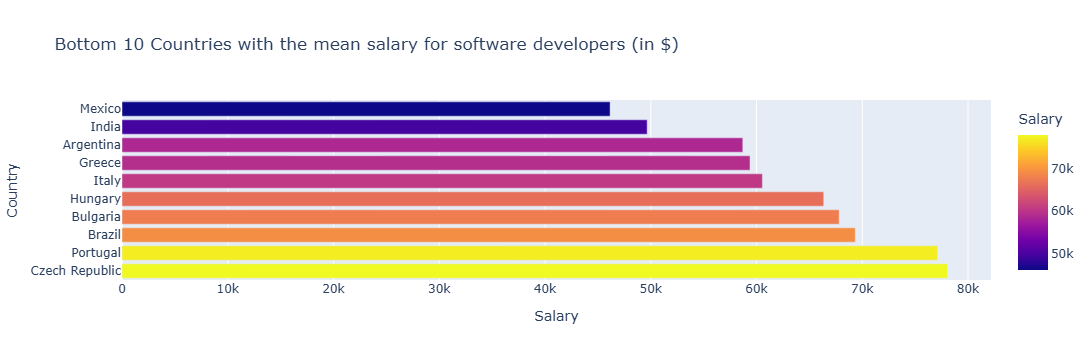

In [108]:
fig = px.bar(data_frame=salary_df.tail(10), x='Salary', y='Country', 
       title='Bottom 10 Countries with the mean salary for software developers (in $)', color = 'Salary')
fig.show()

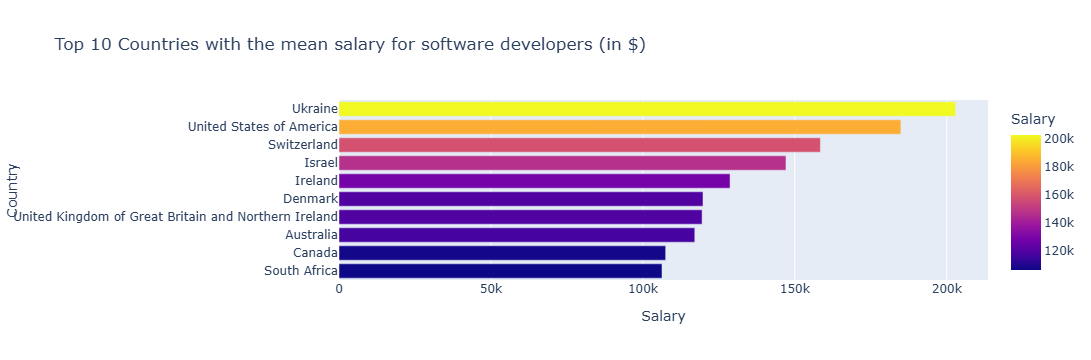

In [109]:
fig = px.bar(data_frame=salary_df.head(10), x='Salary', y='Country', 
       title='Top 10 Countries with the mean salary for software developers (in $)', color = 'Salary')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()